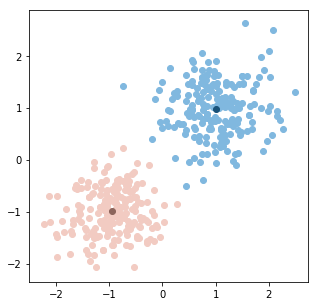

[[ 1.00754477  0.97484364]
 [-0.94673159 -0.99004457]]


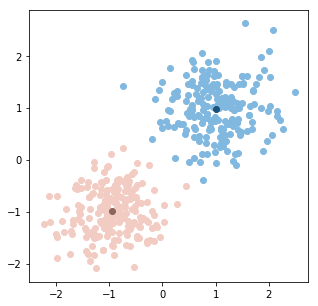

[[ 1.01036338  0.98228225]
 [-0.93977882 -0.98765874]]


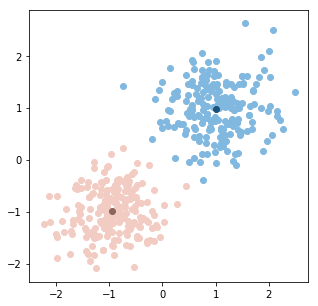

[[ 1.01036338  0.98228225]
 [-0.93977882 -0.98765874]]


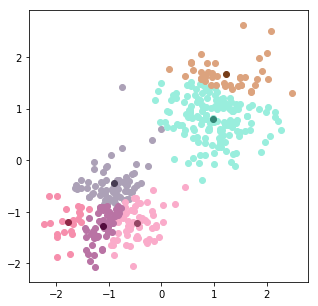

[[-0.91028224 -0.43731277]
 [ 0.97811888  0.80397022]
 [-0.46036539 -1.22251396]
 [-1.10780349 -1.26957245]
 [-1.77811667 -1.19311799]
 [ 1.23002212  1.67331816]]


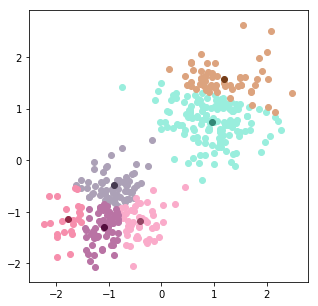

[[-0.8922405  -0.48707052]
 [ 0.95187087  0.7526994 ]
 [-0.40026255 -1.18599219]
 [-1.09588653 -1.30328475]
 [-1.78290141 -1.14809803]
 [ 1.18107873  1.57910223]]


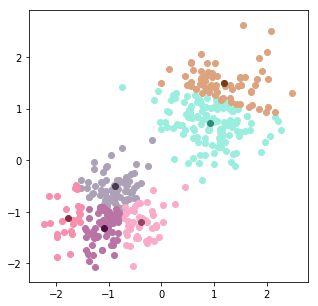

[[-0.87944539 -0.50732076]
 [ 0.92515099  0.71542165]
 [-0.38160513 -1.20531959]
 [-1.0921028  -1.31311189]
 [-1.77585014 -1.12041035]
 [ 1.19210534  1.50508092]]


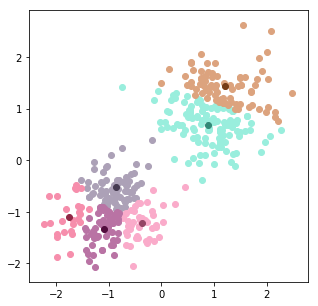

[[-0.86772651 -0.51839783]
 [ 0.88528764  0.67602619]
 [-0.37451319 -1.21200681]
 [-1.09117719 -1.32589553]
 [-1.75089812 -1.0913133 ]
 [ 1.20733336  1.4357364 ]]


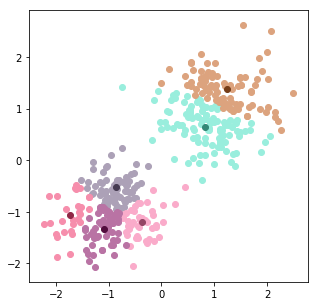

[[-0.8629331  -0.52585899]
 [ 0.82745466  0.65368004]
 [-0.36765686 -1.20216868]
 [-1.08414353 -1.33130213]
 [-1.72400034 -1.0644725 ]
 [ 1.23391849  1.38390717]]


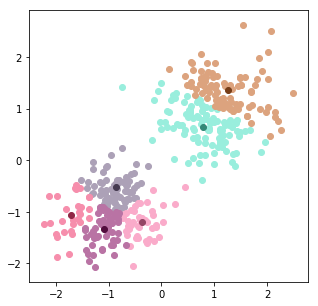

[[-0.8629331  -0.52585899]
 [ 0.79583414  0.65534248]
 [-0.36765686 -1.20216868]
 [-1.07910638 -1.33494768]
 [-1.71201062 -1.06638242]
 [ 1.25718735  1.35843875]]


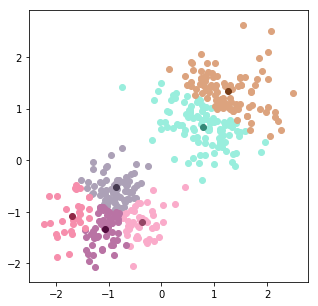

[[-0.8629331  -0.52585899]
 [ 0.77876483  0.65153825]
 [-0.36765686 -1.20216868]
 [-1.07265805 -1.33538586]
 [-1.70316564 -1.07450206]
 [ 1.26126182  1.34058824]]


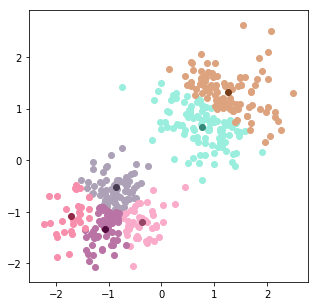

[[-0.8629331  -0.52585899]
 [ 0.76124731  0.65350435]
 [-0.36765686 -1.20216868]
 [-1.07265805 -1.33538586]
 [-1.70316564 -1.07450206]
 [ 1.26964746  1.32447965]]


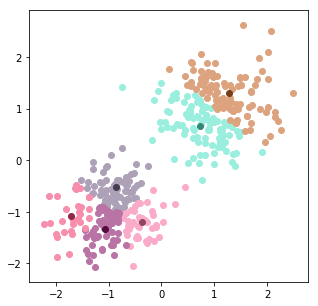

[[-0.8629331  -0.52585899]
 [ 0.73976591  0.65873436]
 [-0.36765686 -1.20216868]
 [-1.07265805 -1.33538586]
 [-1.70316564 -1.07450206]
 [ 1.28096085  1.30583013]]


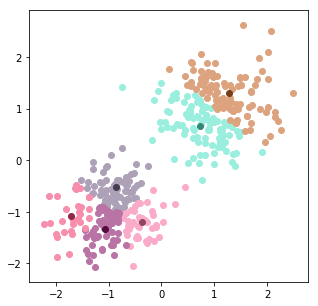

[[-0.8629331  -0.52585899]
 [ 0.73976591  0.65873436]
 [-0.36765686 -1.20216868]
 [-1.07265805 -1.33538586]
 [-1.70316564 -1.07450206]
 [ 1.28096085  1.30583013]]


In [87]:
from numpy import *
from matplotlib import pyplot as plt

def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine)
        dataMat.append(list(fltLine))
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

def genCent(dataSet, k, temp):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    if temp == 0:
        for j in range(n):
            minJ = min(dataSet[:,j:j+1])
            rangeJ = float(max(dataSet[:,j:j+1]) - minJ)
            centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    if temp == 1:
        init = array([[1,2],[-2,-1.5]])
        centroids = mat(init)
    return centroids

datMat = mat(loadDataSet('kmeansclustering.txt'))

def kMeans(dataSet, k, distMeas, createCent, decide):
    m = shape(dataSet)[0]
    colorlist=[0]*k
    for r in range(k):
        colorlist[r]=[random.uniform(0, 0.6),random.uniform(0, 0.6),random.uniform(0, 0.6)]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet, k, decide)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            #find the centroids closest to point i
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
                    
            if clusterAssment[i,0] != minIndex: clusterChanged =True
            clusterAssment[i,:] = minIndex,minDist**2
#         print(centroids)
        plt.figure(figsize=(5, 5))
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = mean(ptsInClust, axis=0)
            plt.scatter(ptsInClust[:,0].A, ptsInClust[:,1].A, color=[0.4+x for x in colorlist[cent]])
            temp_c = centroids[cent].A
#             print(type(temp_c))
            plt.scatter(temp_c[:,:1], temp_c[:,-1:], color=colorlist[cent]) 
        plt.show()
        print(centroids)
    return centroids, clusterAssment

myCentroids, clustAssing = kMeans(datMat,2,distMeas=distEclud,createCent=genCent,decide=1)

myCentroids, clustAssing = kMeans(datMat,6,distMeas=distEclud,createCent=genCent,decide=0)


In [ ]:
def randCent(dataSet, k, temp):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    if temp == 0:
        for j in range(n):
            minJ = min(dataSet[:,j:j+1])
            rangeJ = float(max(dataSet[:,j:j+1]) - minJ)
            centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    if temp == 1:
        init = array([[1,2],[-2,-1.5]])
        centroids = mat(init)
    return centroids


def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    
    for j in range(n):
        minJ = min(dataSet[:,j:j+1])
        rangeJ = float(max(dataSet[:,j:j+1]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids